Import packages

In [588]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns

Load and read CSV

In [589]:
file_path = r'C:\Users\vgrec\Desktop\Coffee Sales\Coffee_Sales.csv'
df = pd.read_csv(file_path)

### **Exploratory Data Analysis (EDA)**

In [590]:
#Dimentions of the data
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1464, and columns are 6.


In [591]:
print(df.size)

8784


In [592]:
#Display the first few rows of data
print("First few rows of data:")
print(df.head())

First few rows of data:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [593]:
#Get information about the dataset
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB
None


In [594]:
# Basic statistics
print("Basic statistics:")
print(df.describe())
print(df.describe(include=['object']))

Basic statistics:
             money
count  1464.000000
mean     32.013661
std       5.317022
min      18.120000
25%      27.920000
50%      32.820000
75%      37.720000
max      40.000000
              date                 datetime cash_type                 card  \
count         1464                     1464      1464                 1375   
unique         186                     1464         2                  588   
top     2024-07-30  2024-03-01 10:15:50.520      card  ANON-0000-0000-0012   
freq            24                        1      1375                   96   

                coffee_name  
count                  1464  
unique                    8  
top     Americano with Milk  
freq                    361  


In [595]:
# Check the dublicated data
print("The dublicated data:")
print(df.duplicated().sum())

The dublicated data:
0


In [596]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


### *Conclusions:*
- *The dataset contains 1464 records and 6 columns, with one numeric column ('money') and the rest being categorical.*
- *There are no duplicate records in the dataset, which is a positive aspect for further analysis.*
- *There are 89 missing values in the 'card' column, while the other columns have no missing values.*
- *The basic statistics for the 'money' column indicate an average coffee price of approximately 32.01 units, with a variation of ±5.32 units (standard deviation).*
- *The 'coffee_name' column shows that 'Americano with Milk' has the highest sales volume, with 361 sales.*
- *For further time-based analysis, the date and datetime columns, which are currently of type object, need to be converted to proper date/time formats. This will enable more effective time-series analysis and utilization of time-based functionalities.*

Let's examine the transactions where the 'card' value is missing

In [597]:
# Display the unique values in the 'cash_type' column
print("Unique values in 'cash_type' column:")
print(df['cash_type'].unique())

Unique values in 'cash_type' column:
['card' 'cash']


In [598]:
# Count the occurrences of each 'cash_type' value with and without missing 'card' values
cash_type_counts = (
    df.groupby(['cash_type', df['card'].isnull()])
    .size()
    .unstack(fill_value=0)
)
print("Count of 'cash_type' values with and without missing 'card' values:")
print(cash_type_counts)

Count of 'cash_type' values with and without missing 'card' values:
card       False  True 
cash_type              
card        1375      0
cash           0     89


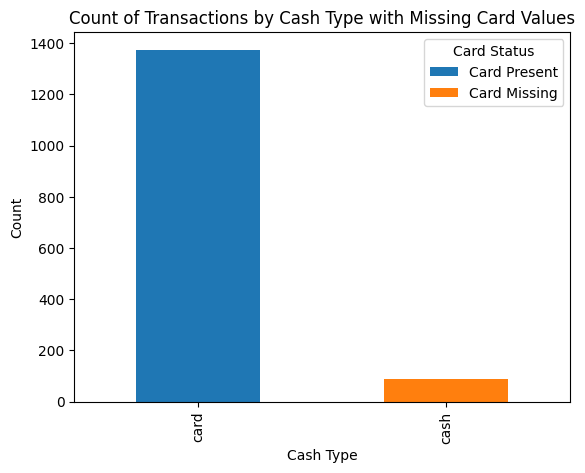

In [599]:
# Visualize the relationship between 'cash_type' and missing 'card' values
cash_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.title('Count of Transactions by Cash Type with Missing Card Values')
plt.legend(['Card Present', 'Card Missing'], title='Card Status')
plt.show()

*The bar chart visualizes the count of transactions by cash type and the presence or absence of card values. It shows that all transactions recorded as 'card' have a valid card value, while transactions recorded as 'cash' do not have a card value. Missing card values are due to the transaction type rather than data issues. As the card column does not provide additional insights for our analysis, we can consider removing it to simplify the dataset.*

In [600]:
# Remove the 'card' column from the DataFrame
df = df.drop('card', axis=1)

In [601]:
# Verify that the 'card' column has been removed
print("Columns after removing the 'card' column:")
print(df.columns)

Columns after removing the 'card' column:
Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')


#### Coffee Sales by Transaction Type and Coffee Type

In [602]:
cash_type_data = df[df['cash_type'] == 'card']

# Group by 'cash_type' and 'coffee_name', and count the occurrences
coffee_counts_by_transaction = (
    df.groupby(['cash_type', 'coffee_name'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

coffee_counts_by_transaction = coffee_counts_by_transaction.rename(columns={
    'cash_type': 'Transaction Type',
    'coffee_name': 'Coffee Type',
    'Count': 'Count'
})

print('Number Coffee Sales by Transaction Type')
print(coffee_counts_by_transaction.to_string(index=False))

Number Coffee Sales by Transaction Type
Transaction Type         Coffee Type  Count
            card Americano with Milk    346
            card               Latte    291
            card          Cappuccino    224
            card           Americano    199
            card             Cortado    136
            card       Hot Chocolate     74
            card            Espresso     58
            card               Cocoa     47
            cash               Latte     25
            cash Americano with Milk     15
            cash          Cappuccino     15
            cash           Americano     14
            cash       Hot Chocolate      6
            cash             Cortado      5
            cash            Espresso      5
            cash               Cocoa      4


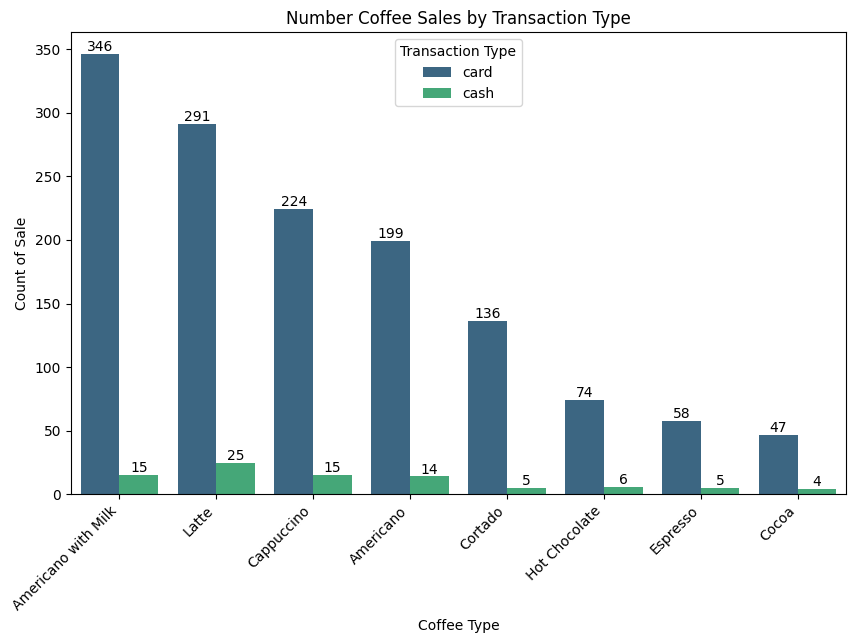

In [603]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coffee Type', y='Count', hue='Transaction Type', data=coffee_counts_by_transaction, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.xlabel('Coffee Type')
plt.ylabel('Count of Sale')
plt.title('Number Coffee Sales by Transaction Type')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Transaction Type', loc='upper center')
plt.show()

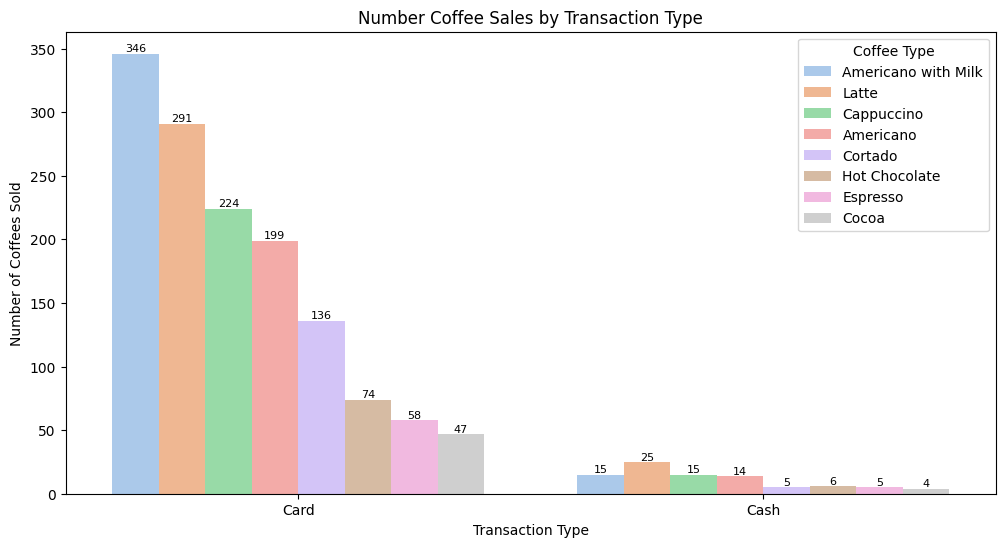

In [604]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("pastel", n_colors=8)
ax = sns.barplot(x='Transaction Type', y='Count', hue='Coffee Type', data=coffee_counts_by_transaction, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Coffees Sold')
plt.title('Number Coffee Sales by Transaction Type')
plt.legend(title='Coffee Type')
plt.xticks(ticks=[0, 1], labels=['Card', 'Cash'])   
plt.show()

*1. Card Transactions:*
- *Top Sellers: Americano with Milk (346), Latte (291), and Cappuccino (224) are the most frequently sold coffee types.*
- *Lowest Seller: Cocoa, with the lowest count at 47.*

*2. Cash Transactions:*
- *Top Sellers: Latte (25), Americano with Milk (15), and Cappuccino (15) are the most frequently sold.*
- *Lowest Seller: Cocoa, with the lowest count at 4.*

*The plots effectively illustrate that card transactions dominate in volume for most coffee types. This overall trend indicates that customers prefer cashless transactions.*

#### Total Revenue from Coffee Sales by Transaction Type and Coffee Type

In [605]:
# Group and aggregate the data by 'cash_type' and 'coffee_name'
sales_by_transaction_and_coffee_sort = (
    df.groupby(['cash_type', 'coffee_name'])['money']
    .sum()
    .reset_index()
    .sort_values(by='money', ascending=False)
)

sales_by_transaction_and_coffee_sort = sales_by_transaction_and_coffee_sort.rename(columns={
    'cash_type': 'Transaction Type',
    'coffee_name': 'Coffee Type',
    'money': 'Total Revenue'
})

print('Total Revenue from Coffee Sales by Transaction Type and Coffee Type')
print(sales_by_transaction_and_coffee_sort.to_string(index=False))

Total Revenue from Coffee Sales by Transaction Type and Coffee Type
Transaction Type         Coffee Type  Total Revenue
            card Americano with Milk       10680.50
            card               Latte       10414.00
            card          Cappuccino        8149.40
            card           Americano        5245.42
            card             Cortado        3561.92
            card       Hot Chocolate        2736.40
            card               Cocoa        1664.06
            card            Espresso        1230.30
            cash               Latte         991.00
            cash          Cappuccino         595.00
            cash Americano with Milk         518.00
            cash           Americano         412.00
            cash       Hot Chocolate         239.00
            cash               Cocoa         157.00
            cash             Cortado         150.00
            cash            Espresso         124.00


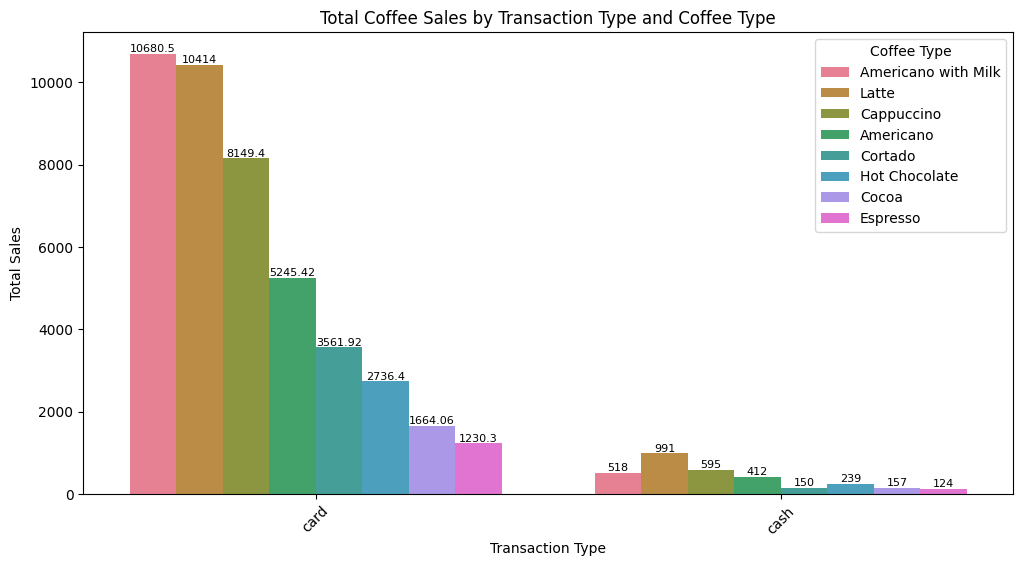

In [606]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", n_colors=8)
ax = sns.barplot(x='Transaction Type', y='Total Revenue', hue='Coffee Type', data=sales_by_transaction_and_coffee_sort, palette=palette)

plt.xlabel('Transaction Type')
plt.ylabel('Total Sales')
plt.title('Total Coffee Sales by Transaction Type and Coffee Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation=45)  
plt.legend(title='Coffee Type')
plt.show()

*1.Card Transactions:*
- *Highest Revenue: Americano with Milk (10680.50 UAH), Latte (10414.00 UAH), and Cappuccino (8149.40 UAH) are the top three coffee types generating the highest revenue.*
- *Lowest Revenue: Cocoa (1664.06 UAH) and Espresso (1230.30 UAH) have the lowest revenue figures.*

*2. Cash Transactions:*
- *Highest Revenue: Latte (991.00 UAH) and Cappuccino (595.00 UAH) are the leading coffee types in terms of revenue, with Americano with Milk (518.00 UAH) also contributing significantly.*
- *Lowest Revenue: Cocoa (157.00 UAH), Cortado(150.00 UAH), and Espresso (124.00 UAH) are at the bottom in terms of revenue.*

*Comparing the revenue with the number of units sold:*

*1. Card Transactions:*
*Americano with Milk, Latte, and Cappuccino not only had the highest number of sales but also generated the most revenue. This indicates that these coffee types are popular and also priced higher.*

*2. Cash Transactions:*
*Although cash transactions were fewer in number, Latte and Cappuccino still generated the highest revenue among cash payments. This suggests that the cash transactions, while less frequent, were made for higher-priced items.*

Let’s develop a function to calculate percentages to simplify subsequent calculations. This function will automatically compute the percentage for each value in a specified count column and store these percentages in a new column called 'percentage'. This will make our analyses clearer and more convenient for further work.

In [607]:
def calculate_percentage(df, count_column):
    """
    Function to calculate percentages based on a count_column and a total count.
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    count_column (str): Name of the column with count values.

    Returns:
    pd.DataFrame: DataFrame with an added 'percentage' column that contains the calculated percentages.
    """
    total_count = df[count_column].sum()
    if total_count == 0:
        print("Warning: Total count is zero. Percentage calculation is not possible.")
        df['Percentage'] = 0  
    else:
        df['Percentage'] = (df[count_column] / total_count).round(4) * 100
        
    return df

Calculate and Display Cash Type Frequencies and Percentages

In [608]:
# Counting values in 'cash_type' column
cash_type_counts = (
    df['cash_type']
    .value_counts()
    .rename_axis('Transaction Type')
    .reset_index(name='Count')
)

In [609]:
# Calculate percentage using the function
cash_type_counts = calculate_percentage(cash_type_counts, 'Count')

# Display cash type counts with percentage
print("Cash type counts with percentage:")
print(cash_type_counts.to_string(index=False))

Cash type counts with percentage:
Transaction Type  Count  Percentage
            card   1375       93.92
            cash     89        6.08


- *The results show a clear preference for card transactions, which dominate at 93.92% of the total. Cash transactions are minimal, accounting for only 6.08%.*
- *This aligns with the general trend towards increasing use of cashless payments in consumer transactions.*

### Analysis of Price Fluctuations for Different Coffee Types depending on the type of payment

In [610]:
# Display the unique values in the 'coffee_name' column
print("Unique values in 'coffee_name' column:")
coffee_names = df['coffee_name'].unique()
print(coffee_names)

Unique values in 'coffee_name' column:
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [611]:
number_coffee = len(coffee_names)
print(number_coffee)

8


In [612]:
df['date']

0       2024-03-01
1       2024-03-01
2       2024-03-01
3       2024-03-01
4       2024-03-01
           ...    
1459    2024-09-05
1460    2024-09-05
1461    2024-09-05
1462    2024-09-05
1463    2024-09-05
Name: date, Length: 1464, dtype: object

In [613]:
# Convert the 'date' column to datetime format for accurate date-based operations and visualizations
df['date'] = pd.to_datetime(df['date'])

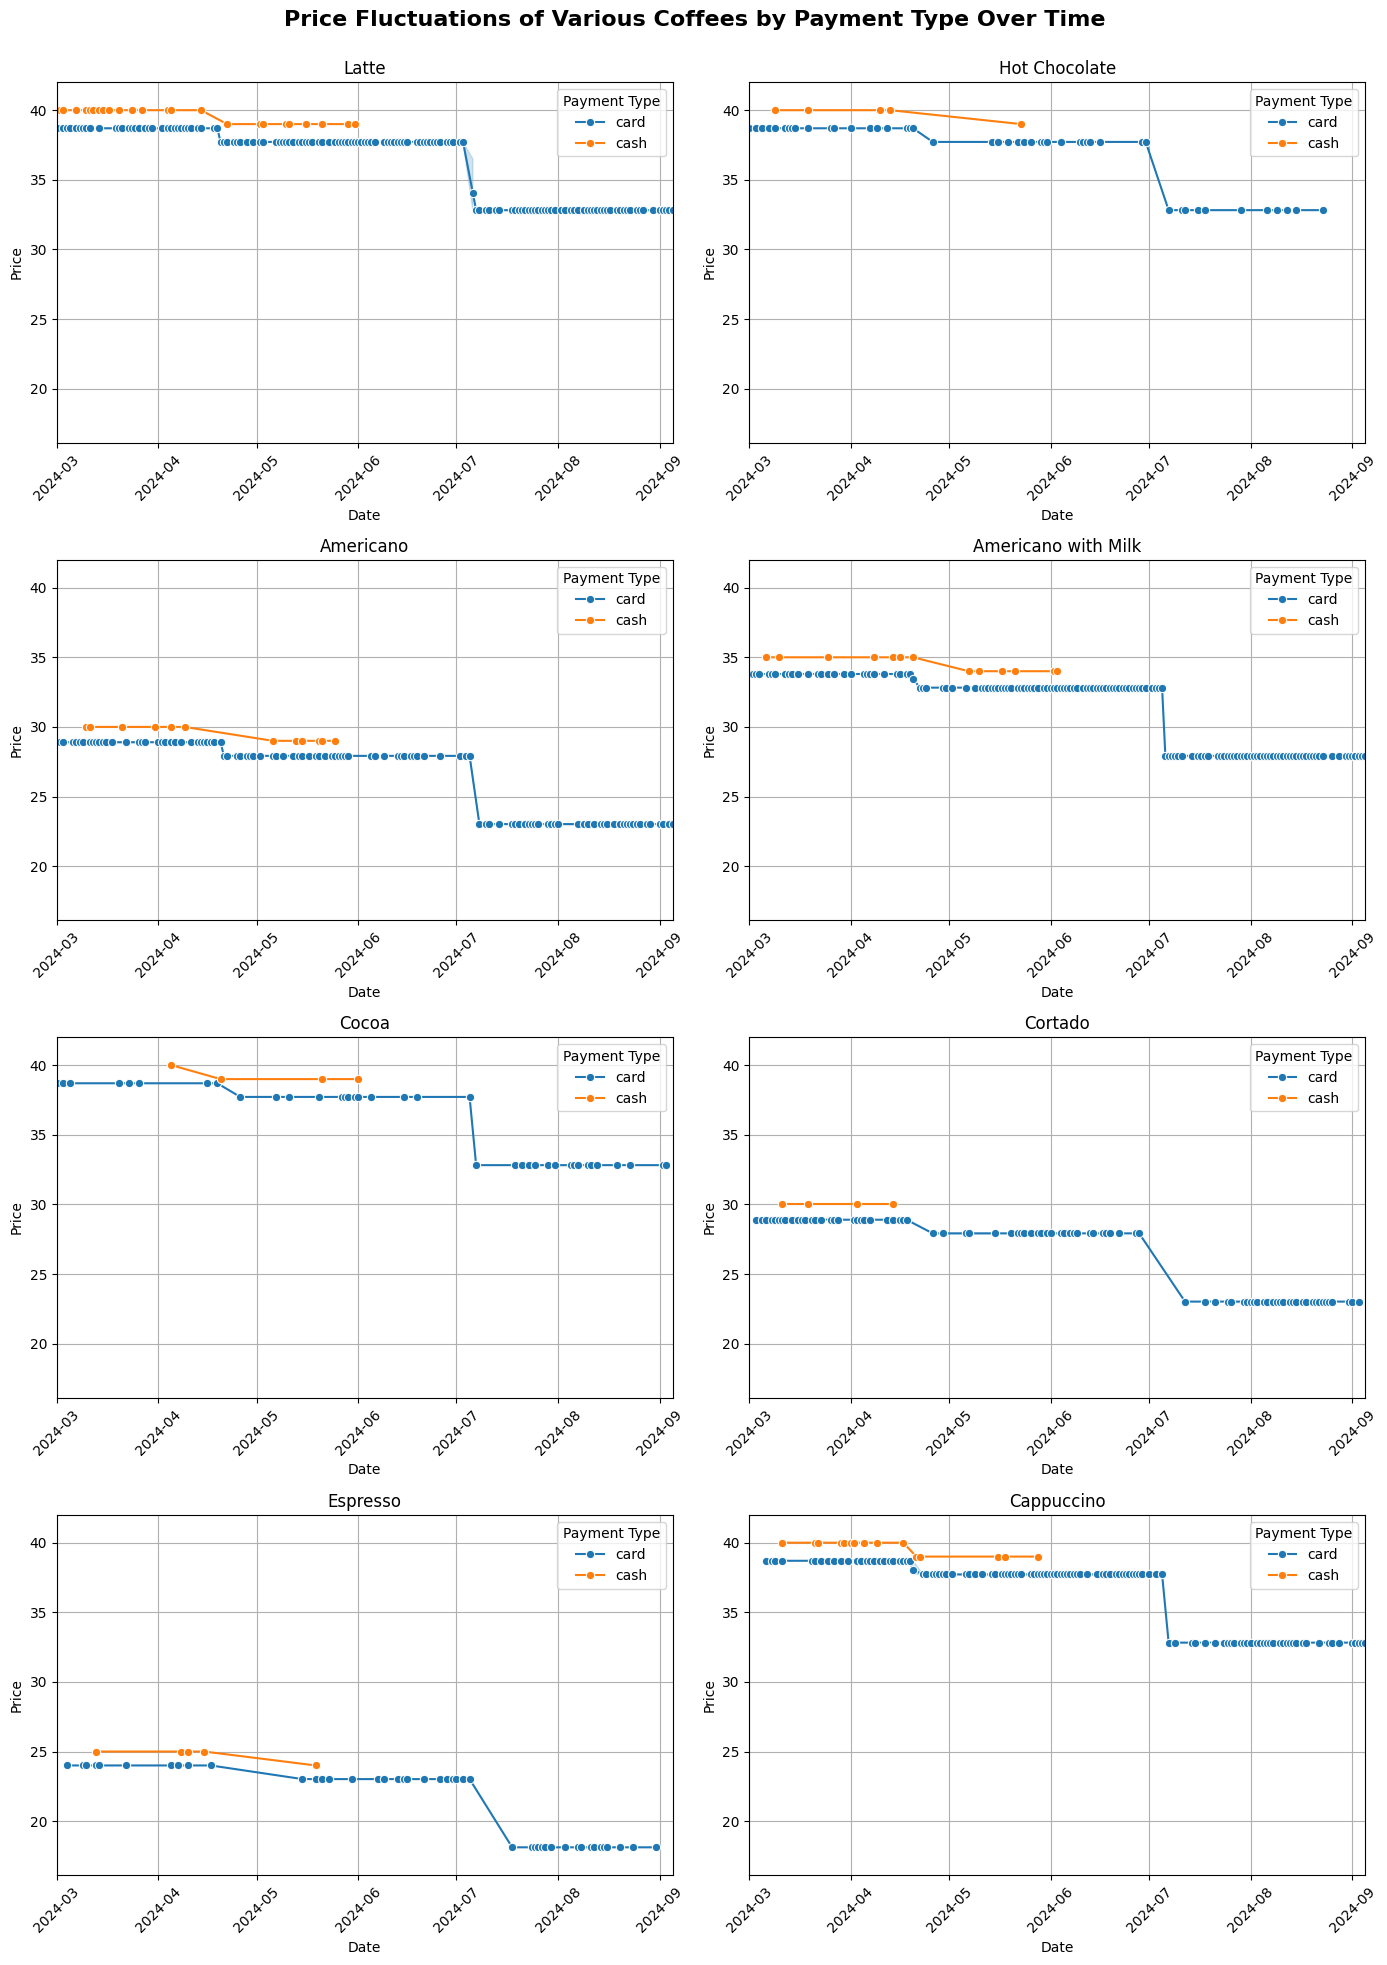

In [614]:
# Calculate the minimum and maximum values for 'money' and 'date' columns
# These values are used to set consistent axis limits across all subplots
y_min = df['money'].min()
y_max = df['money'].max()
x_min = df['date'].min()
x_max = df['date'].max()

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()

fig.suptitle('Price Fluctuations of Various Coffees by Payment Type Over Time',
             fontsize=16, fontweight='bold')

# Iterate through each coffee type and create a subplot
for i, coffee in enumerate(coffee_names):
    coffee_data = df[df['coffee_name'] == coffee]
    sns.lineplot(data=coffee_data, x='date', y='money', hue='cash_type',
                 marker='o', ax=axes[i])
    axes[i].set_title(coffee)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].set_ylim(y_min - 2, y_max + 2)

    # Setting the X-axis to display labels by month
    axes[i].set_xlim(x_min, x_max)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Payment Type')
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

*The analysis indicates that prices for each type of coffee were consistently lower when paid by card compared to cash. This could be due to efforts to encourage customers to gradually transition to cashless payments. As a result, since the beginning of June, cash transactions have disappeared, suggesting that coffee vending machines have likely switched to fully cashless transactions. This reflects a broader trend towards increasing adoption of cashless payments.* 

*Additionally, there is a general decrease in unit prices for all types of coffee, regardless of payment method, with price drops occurring on specific, yet closely timed dates. This price reduction may be part of a strategy to stimulate sales. It is also worth investigating whether the decrease in coffee prices has led to an increase in the number of sales.*

##### The average price for each coffee type

In [615]:
# Calculate the average price for each coffee type
average_price_coffee = (
    df.groupby('coffee_name')['money']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='money', ascending=False)
)

average_price_coffee = average_price_coffee.rename(columns={
    'coffee_name': 'Coffee Type',
    'money': 'Average Price'
})

print("Average Price for Each Coffee Type:")
print(average_price_coffee.to_string(index=False))

Average Price for Each Coffee Type:
        Coffee Type  Average Price
      Hot Chocolate          37.19
         Cappuccino          36.59
              Latte          36.09
              Cocoa          35.71
Americano with Milk          31.02
          Americano          26.56
            Cortado          26.33
           Espresso          21.50


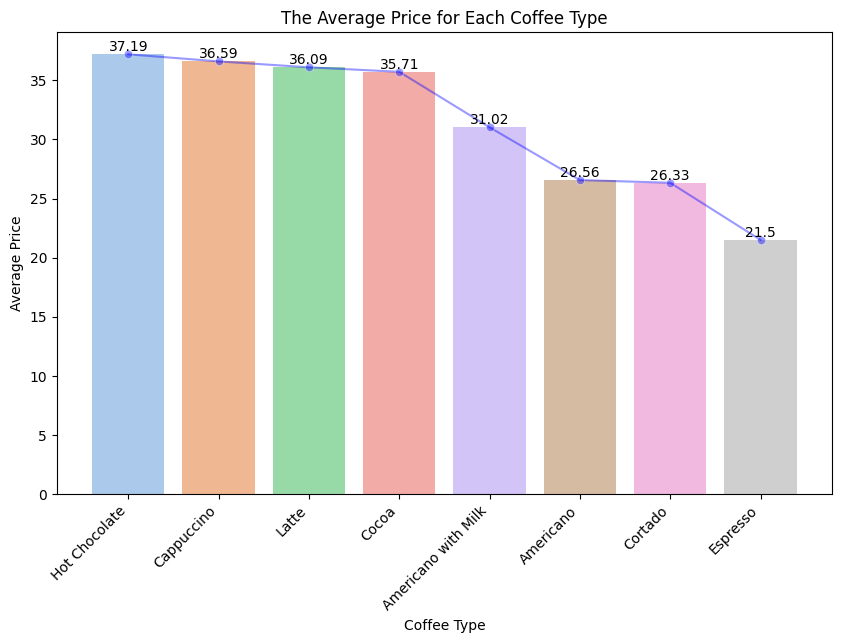

In [616]:
plt.figure(figsize=(10, 6))

# Bar plot
palette = sns.color_palette("pastel", n_colors=len(average_price_coffee))
ax = sns.barplot(x='Coffee Type', y='Average Price', data=average_price_coffee, palette=palette, hue='Coffee Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Line plot
sns.lineplot(x='Coffee Type', y='Average Price', data=average_price_coffee, color='blue', marker='o', ax=ax, alpha=0.4)

plt.xlabel('Coffee Type')
plt.ylabel('Average Price')
plt.title('The Average Price for Each Coffee Type')
plt.xticks(rotation=45, ha='right')

plt.show()

*The analysis reveals that Hot Chocolate has the highest average price at 37.19 UAH, followed closely by Cappuccino at 36.59 UAH and Latte at 36.09 UAH. On the other hand, Espresso has the lowest average price at 21.50 UAH.*

*These results confirm the general trend that more complex or specialty beverages have higher prices due to the use of expensive ingredients and the complexity of preparation. In contrast, basic beverages like Espresso have a lower cost due to fewer ingredients and a simpler preparation process.*

### Coffee Sales by Coffee Type

#### Number of Coffee Sales by Coffee Type

In [617]:
# Count the number of each type of coffee sold
coffee_counts = (
    df['coffee_name']
    .value_counts()
    .rename_axis('Coffee Type')
    .reset_index(name='Count')
)

# Calculate percentage using the function
coffee_counts = calculate_percentage(coffee_counts, 'Count')

print('Counts and Percentages of Each Coffee Type Sold:')
print(coffee_counts.to_string(index=False))

Counts and Percentages of Each Coffee Type Sold:
        Coffee Type  Count  Percentage
Americano with Milk    361       24.66
              Latte    316       21.58
         Cappuccino    239       16.33
          Americano    213       14.55
            Cortado    141        9.63
      Hot Chocolate     80        5.46
           Espresso     63        4.30
              Cocoa     51        3.48


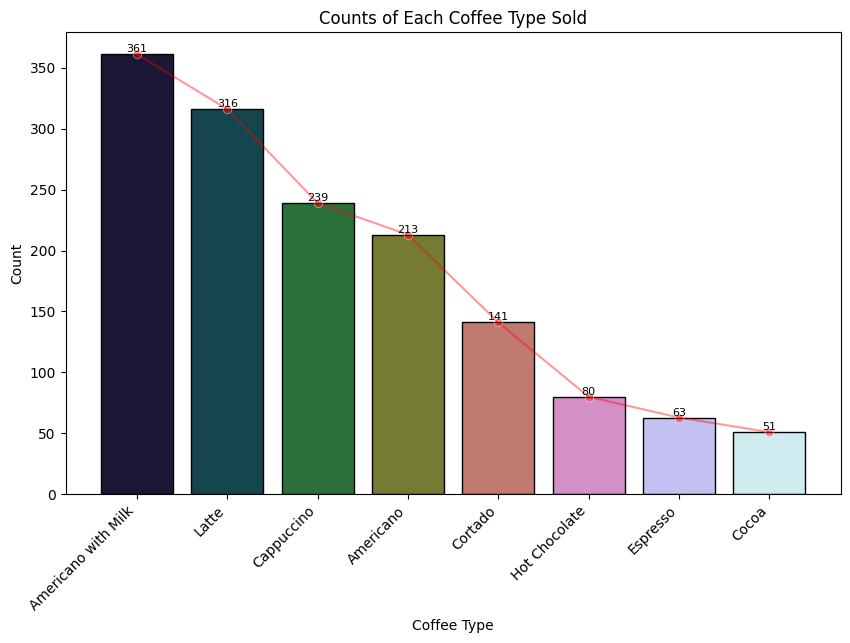

In [618]:
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis
palette = sns.color_palette("cubehelix", n_colors=len(coffee_counts))

# Bar plot
bars = ax.bar(coffee_counts['Coffee Type'], coffee_counts['Count'], color=palette, edgecolor='black')

# Line plot
sns.lineplot(x='Coffee Type', y='Count', data=coffee_counts, color='red', marker='o', ax=ax, alpha=0.4)

ax.bar_label(bars, fontsize=8)

plt.xlabel("Coffee Type")
plt.ylabel("Count")
plt.title("Counts of Each Coffee Type Sold")
plt.xticks(rotation=45, ha='right')

plt.show()

*1. Top Sellers:*
- *Americano with Milk: 361 sales, accounting for 24.66% of the total.*
- *Latte: 316 sales, accounting for 21.58% of the total.*
- *Cappuccino: 239 sales, accounting for 16.33% of the total.*

*2. Less Popular Coffee Types:*
- *Espresso: 63 sales, accounting for 4.30% of the total.*
- *Cocoa: 51 sales, accounting for 3.48% of the total.*

*These results indicate that Americano with Milk, Latte, and Cappuccino are the most popular among consumers. In contrast, Cocoa and Espresso have significantly lower sales, which may reflect specific taste preferences or lesser popularity among customers.*

#### Total Revenue from Coffee Sales by Coffee Type

In [619]:
# Calculate total sales for each type of coffee
coffee_sales = (
    df.groupby('coffee_name')['money']
    .sum()
    .reset_index(name='Total Sales')
)

# Rename the column 'coffee_name' to 'Coffee Type'
coffee_sales = coffee_sales.rename(columns={'coffee_name': 'Coffee Type'})

# Calculate percentage using the function
coffee_sales = calculate_percentage(coffee_sales, 'Total Sales')

# Sort by Total Sales in descending order
coffee_sales = coffee_sales.sort_values(by='Total Sales', ascending=False)

# Print total sales and percentage for each type of coffee
print("Total sales and percentage for each type of coffee:")
print(coffee_sales.to_string(index=False))

Total sales and percentage for each type of coffee:
        Coffee Type  Total Sales  Percentage
              Latte     11405.00       24.33
Americano with Milk     11198.50       23.89
         Cappuccino      8744.40       18.66
          Americano      5657.42       12.07
            Cortado      3711.92        7.92
      Hot Chocolate      2975.40        6.35
              Cocoa      1821.06        3.89
           Espresso      1354.30        2.89


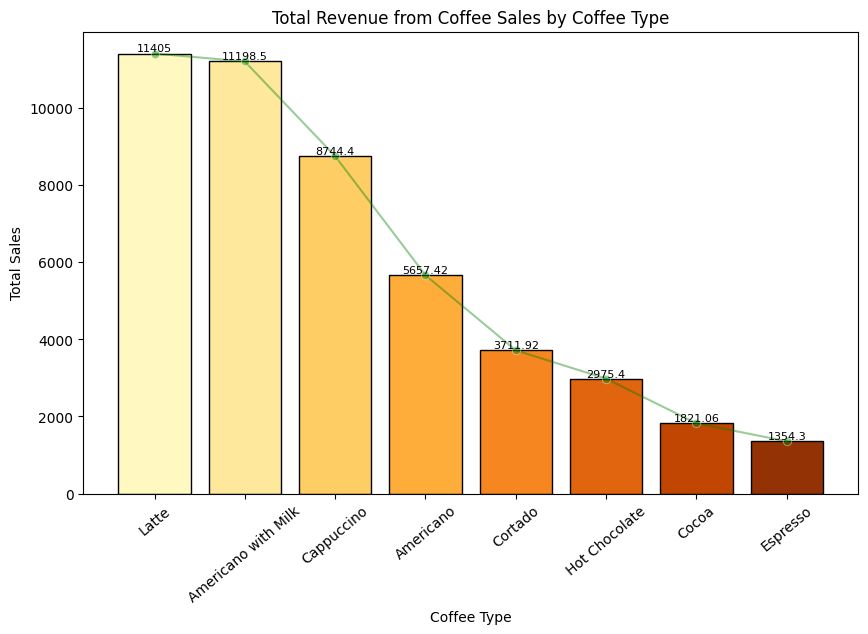

In [620]:
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

palette = sns.color_palette("YlOrBr", n_colors=len(coffee_sales))

# Bar plot
bars = ax.bar(coffee_sales['Coffee Type'], coffee_sales['Total Sales'], color=palette, edgecolor='black')

# Line plot
sns.lineplot(x='Coffee Type', y='Total Sales', data=coffee_sales, color='green', marker='o', ax=ax, alpha=0.4)

ax.bar_label(bars, fontsize=8)

plt.xlabel("Coffee Type")
plt.ylabel("Total Sales")
plt.title("Total Revenue from Coffee Sales by Coffee Type")
plt.xticks(rotation=40)

plt.show()

*1. Leaders by Revenue:*
- *Latte: 11405.00 UAH, accounting for 24.33% of the total revenue.*
- *Americano with Milk: 11198.50 UAH, accounting for 23.89% of the total revenue.*
- *Cappuccino: 8744.40 UAH, accounting for 18.66% of the total revenue.*

*2. Less Popular Coffee Types:*
- *Cocoa: 1821.06 UAH, accounting for 3.89% of the total revenue.*
- *Espresso: 1354.30 UAH, accounting for 2.89% of the total revenue.*

*Comparing the revenue with the number of units sold:*

*Americano with Milk was the leader in terms of the number of sales, with 361 units sold, which is 45 units more than Latte, with 316 units. However, in terms of total revenue, Latte is the leader, earning 11405.00 UAH, which is nearly equal to the revenue from Americano with Milk, which was 11198.50 UAH.* 

*Although Americano with Milk had a higher number of sales, Latte generated slightly more revenue due to its higher average price. This indicates that while both beverages were popular, the higher unit price of Latte allowed it to achieve nearly the same revenue level as Americano with Milk, despite having fewer sales.*

Percentage of Total Number of Sales by Coffee Type

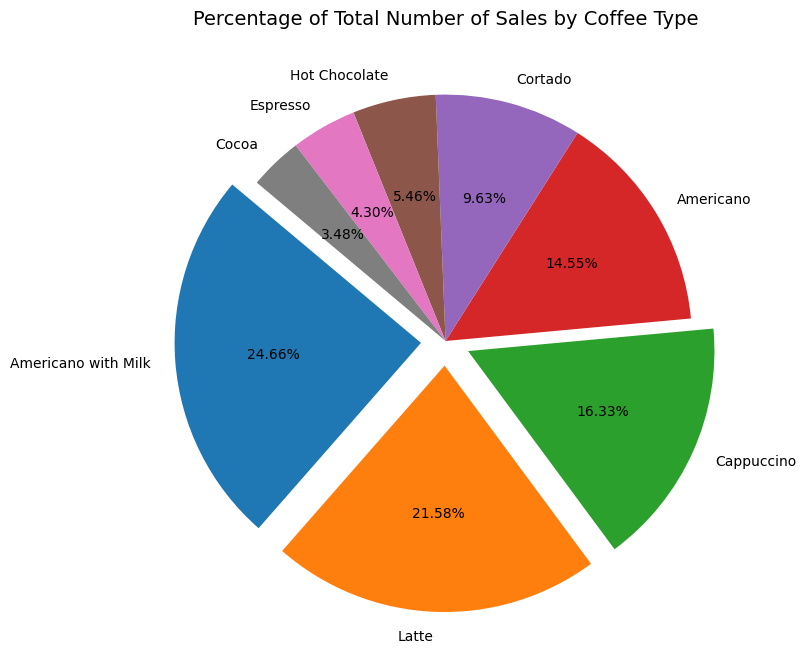

In [621]:
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0) 
plt.figure(figsize=(8, 8))

plt.pie(
    coffee_counts['Count'], 
    labels=coffee_counts['Coffee Type'], 
    explode=explode, 
    autopct='%1.2f%%',
    startangle=140
)

plt.title('Percentage of Total Number of Sales by Coffee Type', fontsize=14)
plt.show()

Percentage of Total Revenue by Coffee Type

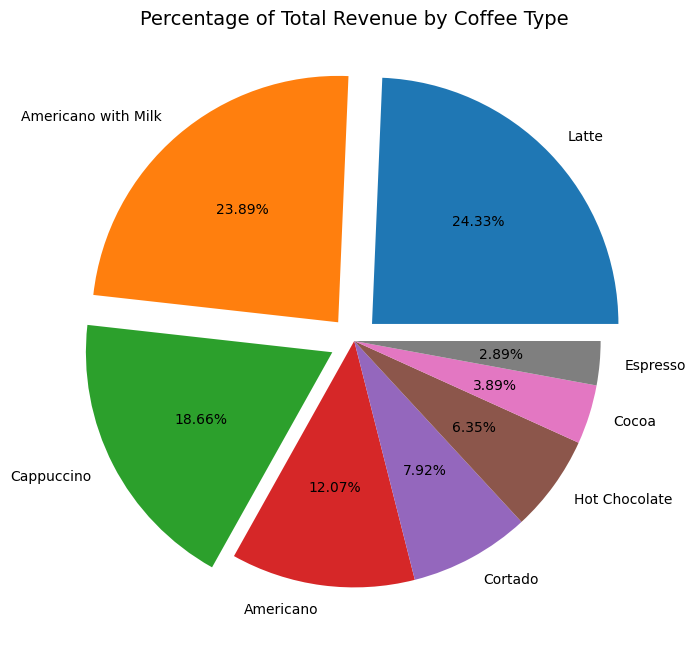

In [622]:
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0) 
plt.figure(figsize=(8, 8))
plt.pie(
    coffee_sales['Total Sales'],  
    labels=coffee_sales['Coffee Type'],  
    explode=explode,
    autopct='%1.2f%%'
)

plt.title('Percentage of Total Revenue by Coffee Type', fontsize=14)
plt.show()

### Overview of Coffee Sales Analysis: Temporal Trends and Patterns

In [623]:
# Convert date and datetime to datetime format
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create columns for Month, Weekdays, and Hours with proper sorting format
df['month']=df['date'].dt.strftime('%Y-%m')
df['day']=df['date'].dt.strftime('%w')
df['hour']=df['datetime'].dt.strftime('%H')

#Create a column for Month in 'Month Year' format
df['month_display'] = df['date'].dt.strftime('%B %Y')  # Full month name and year
# Create a column for Day of the Week in 'Day Weekday' format
df['day_display'] = df['date'].dt.strftime('%A')  # Full weekday name

In [624]:
# Check the type of 'date' and 'datetime' columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1464 non-null   datetime64[ns]
 1   datetime       1464 non-null   datetime64[ns]
 2   cash_type      1464 non-null   object        
 3   money          1464 non-null   float64       
 4   coffee_name    1464 non-null   object        
 5   month          1464 non-null   object        
 6   day            1464 non-null   object        
 7   hour           1464 non-null   object        
 8   month_display  1464 non-null   object        
 9   day_display    1464 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 114.5+ KB
None


In [625]:
print(df.head())

        date                datetime cash_type  money    coffee_name    month  \
0 2024-03-01 2024-03-01 10:15:50.520      card   38.7          Latte  2024-03   
1 2024-03-01 2024-03-01 12:19:22.539      card   38.7  Hot Chocolate  2024-03   
2 2024-03-01 2024-03-01 12:20:18.089      card   38.7  Hot Chocolate  2024-03   
3 2024-03-01 2024-03-01 13:46:33.006      card   28.9      Americano  2024-03   
4 2024-03-01 2024-03-01 13:48:14.626      card   38.7          Latte  2024-03   

  day hour month_display day_display  
0   5   10    March 2024      Friday  
1   5   12    March 2024      Friday  
2   5   12    March 2024      Friday  
3   5   13    March 2024      Friday  
4   5   13    March 2024      Friday  


In [626]:
# Find the minimum and maximum date in the 'date' column
min_date = df['date'].min()
max_date = df['date'].max()
 
# Print the time range
print(f"Date range: {min_date} to {max_date}")

Date range: 2024-03-01 00:00:00 to 2024-09-05 00:00:00


#### The number of coffee sales for each month

In [627]:
# Group by 'month' and count the number of sales for each month
monthly_sales_count = (
    df.groupby('month')['date']
    .count()
    .reset_index(name='Count')
    .rename(columns={'month': 'Month'})
)

# Print the number of coffee sold each month
print("Number of coffee sold each month:")
print(monthly_sales_count.to_string(index=False))

Number of coffee sold each month:
  Month  Count
2024-03    206
2024-04    196
2024-05    267
2024-06    227
2024-07    237
2024-08    272
2024-09     59


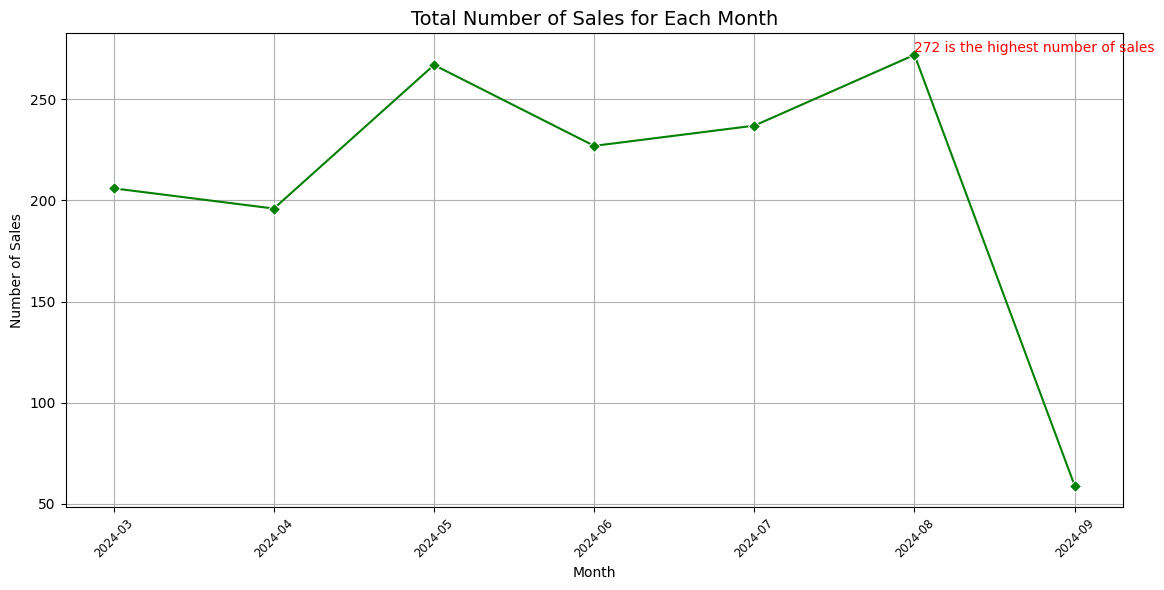

In [628]:
# Plot the number of sales for each month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', data=monthly_sales_count, marker='D', color='green')
plt.title('Total Number of Sales for Each Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Sales')

# Adding text to the plot
# Find the maximum sales value and its position
max_sales = monthly_sales_count['Count'].max()
max_index = monthly_sales_count['Count'].idxmax()
max_month = monthly_sales_count['Month'][max_index]

# Add text at the position of the highest sales
plt.text(x=max_month, y=max_sales, s=f'{max_sales} is the highest number of sales',
         horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='red')

plt.xticks(rotation=45, size='small')
plt.grid(True)
plt.tight_layout()
plt.show()

- *The highest number of sales occurred in August 2024, with 272 coffees sold.*
- *The lowest number of sales among full months was in April 2024, with 196 coffees sold.*
- *There was a notable increase in sales in May and August during the analyzed period.*

#### Total Revenue for each month

In [629]:
# Calculate the total revenue for each month
monthly_total_sales = (
    df.groupby('month')['money']
    .sum()
    .reset_index(name='Total Revenue')
    .rename(columns={'month': 'Month'})
)

print("Total Revenue for each month:")
print(monthly_total_sales.to_string(index=False))

Total Revenue for each month:
  Month  Total Revenue
2024-03        7050.20
2024-04        6720.56
2024-05        9063.42
2024-06        7758.76
2024-07        6915.94
2024-08        7613.84
2024-09        1745.28


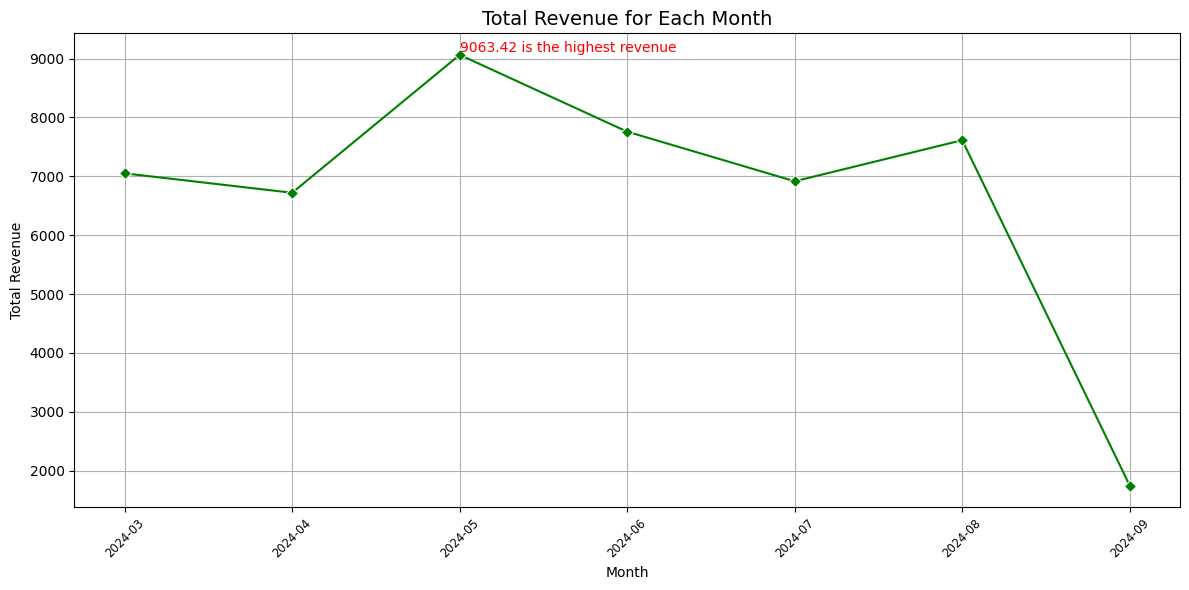

In [630]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Revenue', data=monthly_total_sales, marker='D', color='green')
plt.title('Total Revenue for Each Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Adding text to the plot
# Find the maximum total sales value and its position
max_sales = monthly_total_sales['Total Revenue'].max()
max_index = monthly_total_sales['Total Revenue'].idxmax()
max_month = monthly_total_sales['Month'][max_index]

# Add text at the position of the highest sales
plt.text(x=max_month, y=max_sales, s=f'{max_sales:.2f} is the highest revenue',
         horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='red')

plt.xticks(rotation=45, size='small')
plt.grid(True)
plt.tight_layout()
plt.show()

- *The highest revenue was generated in May 2024, amounting to 9063.42 UAH.*
- *The lowest revenue among full months was recorded in April 2024, totaling 6720.56 UAH.*
- *A significant peak in revenue occurred in May 2024, while revenues for other months remained relatively stable.*

*Comparing the revenue with the number of units sold:*
- *In August 2024, there were 272 sales — the highest of all months. Although the number of sales in August exceeded that of May by 5 units, the revenue in August was 7613.84 UAH, which is lower than the revenue for May by 1449.58 UAH. In May 2024, the revenue reached its peak at 9063.42 UAH with 267 sales.*
- *Despite the higher number of sales in August, the revenue decreased by 1449.58 UAH compared to May. This indicates that the average price of coffee in August was lower than in May, likely due to a drop in coffee prices that occurred in July 2024.*
- *Thus, May 2024 was the most successful month in terms of revenue, where there was a strong correlation between sales volume and revenue. In contrast, August saw a decrease in revenue despite higher sales, due to the lower average coffee price.*

#### Monthly Coffee Sales Quantity by Type of Coffee

In [631]:
# Calculate the number of each type of coffee sold each month
monthly_coffee_qty = (
    df.groupby(['month', 'coffee_name'])['date']
    .count()
    .reset_index(name='Sales Count')
    .rename(columns={'coffee_name': 'Coffee Type'})
)

# Pivot the table to make 'Month' the index and 'Coffee Type' the columns
monthly_coffee_qty_pivot = (
    monthly_coffee_qty.pivot(index='month', columns='Coffee Type', values='Sales Count')
    .fillna(0)  # Replace NaN values with 0
    .astype(int)  # Convert all values to integers
)

# Print total number of each type of coffee sold each month
print("Total number of each type of coffee sold each month:")
print(monthly_coffee_qty_pivot)

Total number of each type of coffee sold each month:
Coffee Type  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
month                                                                     
2024-03             36                   34          20      6       30   
2024-04             35                   42          43      6       19   
2024-05             48                   58          55      9       17   
2024-06             14                   69          46      5       19   
2024-07             36                   65          32      9       14   
2024-08             37                   72          34     11       40   
2024-09              7                   21           9      5        2   

Coffee Type  Espresso  Hot Chocolate  Latte  
month                                        
2024-03            10             22     48  
2024-04             7             13     31  
2024-05             8             14     58  
2024-06            10             14     

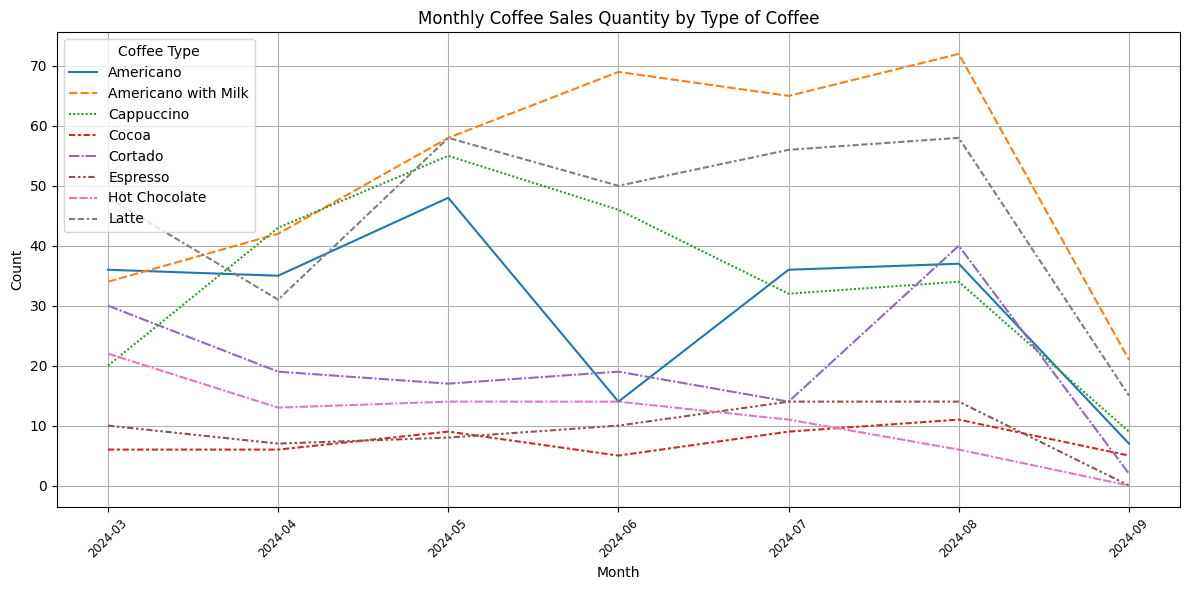

In [632]:
# Plot the number of each type of coffee sold each month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_coffee_qty_pivot)
plt.title('Monthly Coffee Sales Quantity by Type of Coffee')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Coffee Type', loc='upper left')
plt.xticks(ticks=range(len(monthly_coffee_qty_pivot.index)), labels=monthly_coffee_qty_pivot.index, rotation=45, size='small')
plt.grid(True)
plt.tight_layout()
plt.show()

- *Americano with Milk: Highest sales in August (72 sales).* 
- *Latte: Highest sales in August and May (58 sales).* 
- *Cappuccino: Highest sales in May (55 sales), followed by a gradual decline to 34 sales in August.*
- *Espresso: Lowest sales in April (7 sales).* 
- *Cocoa: Lowest sales in June (5 sales).*

*Latte, Americano with Milk, and Cappuccino remain the most popular coffee types. Following a significant price reduction in July, there is a general slight increase in sales without major spikes. The largest increase was observed for Cortado, which rose from 14 units in July to 40 units in August. This increase may be partly related to the price reduction but could also be influenced by marketing campaigns or other factors. To gain a clear understanding of the impact of price reductions on sales, it is important to consider additional factors such as promotional activities.*

#### Monthly Coffee Sales Revenue by Type of Coffee

In [633]:
# Calculate the total sales for each coffee type each month
monthly_coffee_sales = (
    df.groupby(['month', 'coffee_name'])['money']
    .sum()
    .reset_index(name='Total Sales')
    .rename(columns={'coffee_name': 'Coffee Type'})
)

# Pivot the table to make 'Month' the index and 'Coffee Type' the columns
monthly_coffee_sales_pivot = (
    monthly_coffee_sales.pivot(index='month', columns='Coffee Type', values='Total Sales')
    .fillna(0)
)

# Print total sales for each type of coffee each month
print("Total sales for each type of coffee each month:")
print(monthly_coffee_sales_pivot)

Total sales for each type of coffee each month:
Coffee Type  Americano  Americano with Milk  Cappuccino   Cocoa  Cortado  \
month                                                                      
2024-03        1044.80              1154.00      780.50  232.20   869.20   
2024-04        1001.94              1407.74     1659.44  232.82   548.48   
2024-05        1348.80              1908.28     2078.44  340.76   474.64   
2024-06         390.88              2268.12     1735.12  189.88   530.48   
2024-07         858.12              1863.80     1079.64  300.28   322.28   
2024-08         851.74              2010.24     1115.88  361.02   920.80   
2024-09         161.14               586.32      295.38  164.10    46.04   

Coffee Type  Espresso  Hot Chocolate    Latte  
month                                          
2024-03        241.00         854.00  1874.50  
2024-04        171.00         506.02  1193.12  
2024-05        185.14         529.36  2198.00  
2024-06        230.20      

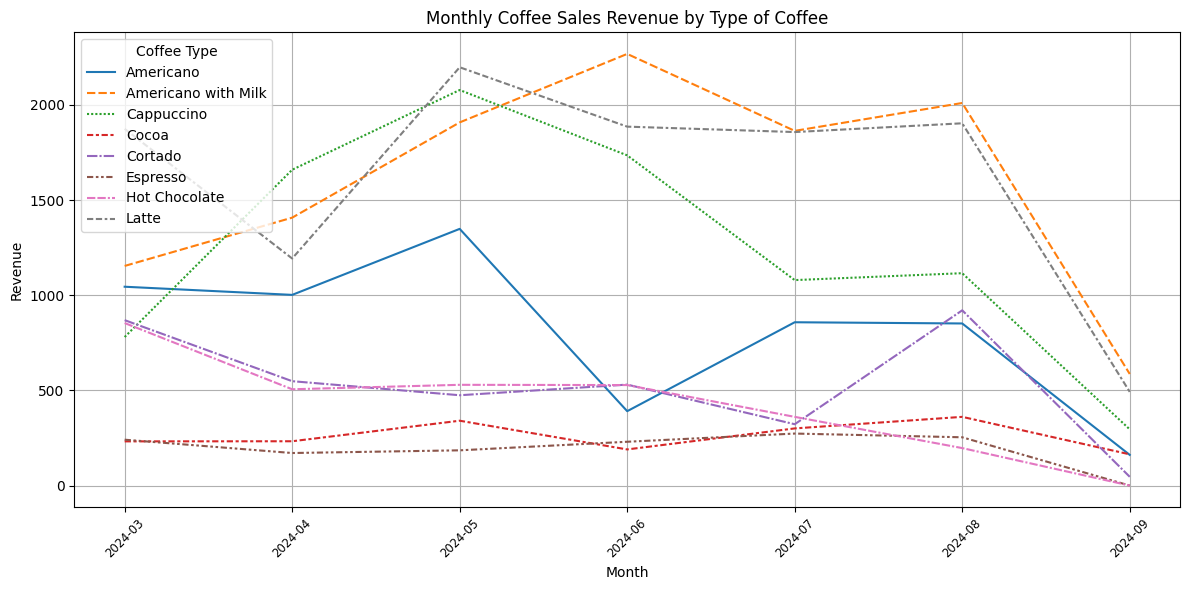

In [634]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_coffee_sales_pivot)
plt.title('Monthly Coffee Sales Revenue by Type of Coffee')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Coffee Type', loc='upper left')
plt.xticks(ticks=range(len(monthly_coffee_sales_pivot.index)), labels=monthly_coffee_sales_pivot.index, rotation=45, size='small')
plt.grid(True)
plt.tight_layout()
plt.show()

- *Americano with Milk: The highest revenue was in June 2024 — 2268.12 UAH, which is the highest among all coffee types during the entire period.*
- *Latte: The highest revenue was in May 2024 — 2198.00 UAH.*
- *Cappuccino: In May 2024, Cappuccino generated the highest revenue — 2078.44 UAH, which gradually decreased to 1115.88 UAH in August.*
- *Espresso: The lowest revenue was recorded in April 2024 — 171.00 UAH.*
- *Cocoa: The lowest revenue from Cocoa sales was in March — 232.20 UAH.*

*Latte, Americano with Milk, and Cappuccino remain the most profitable coffee types. Following a significant price reduction in July, there is a general slight increase in revenue without major spikes. The largest increase in revenue was observed for Cortado, which rose from 322.28 UAH in July to 920.80 UAH in August. This increase may be partly related to the price reduction but could also be influenced by marketing campaigns or other factors.*

*Due to the price reduction in July, revenue changes are less pronounced compared to the changes in the quantity of coffee sold.*

*Overall, the gradual reduction in the price of all coffee types had a minimal impact on both the quantity of coffee sold and the revenue.*

### Sales Distribution by Day of the Week

Analyzing the number of coffee sales across different days of the week to identify trends in daily sales

In [635]:
# Group by 'day' and count the number of sales for each day
weekday_sales = (
    df.groupby('day')['date']
    .count()
    .reset_index(name='Count')
    .rename(columns={'day': 'Day'})
)

# Print the number of coffee sold each day
print("Number of coffee sold each day:")
print(weekday_sales.to_string(index=False))

Number of coffee sold each day:
Day  Count
  0    198
  1    200
  2    237
  3    209
  4    222
  5    197
  6    201


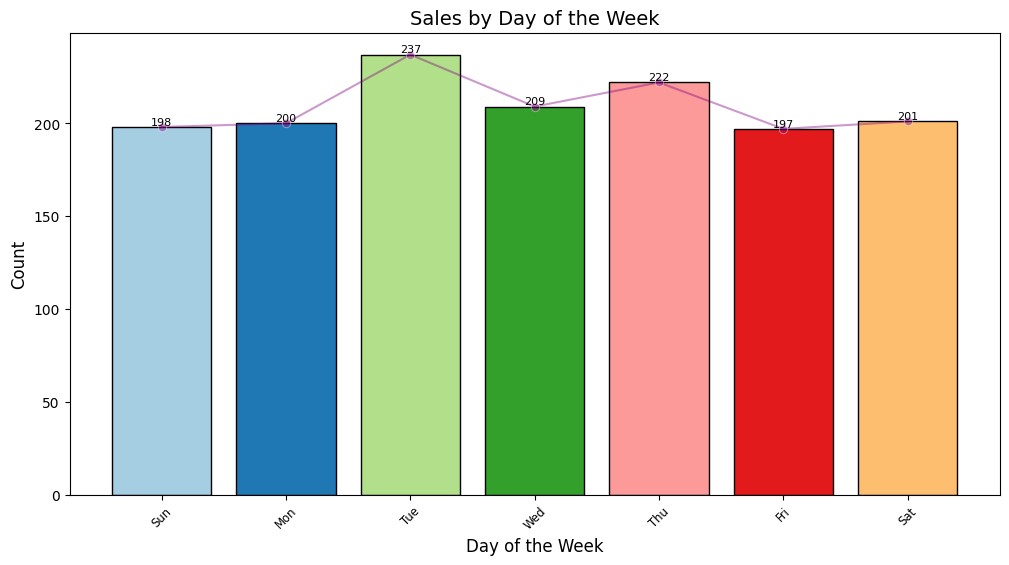

In [636]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get current axis
palette = sns.color_palette("Paired", n_colors=len(weekday_sales))

# Bar plot
bars = ax.bar(weekday_sales['Day'], weekday_sales['Count'], edgecolor='black', color=palette)

# Line plot
sns.lineplot(x='Day', y='Count', data=weekday_sales, color='purple', marker='o', ax=ax, alpha=0.4)
plt.xticks(ticks=range(len(weekday_sales['Day'])), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], size='small')
ax.bar_label(bars, fontsize=8)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sales by Day of the Week', fontsize=14)
plt.xticks(rotation=45)
plt.show()

- *The highest sales were noted on Tuesday (237 sales) and Thursday (222 sales), which may be related to increased customer traffic or promotional activities.*
- *Sales remain consistent throughout the week, with a slight decrease on weekends, reflecting typical consumer demand for coffee.*

*Overall, the distribution of sales across days of the week is approximately uniform, with no significant differences in demand, indicating a stable level of coffee demand throughout the week.*

Examining the quantities of different coffee types sold each day of the week to understand daily preferences

Number of Sales for Each Coffee Type Each Day

In [637]:
# Calculate the number of sales for each coffee type by day of the week
weekday_coffee_sales_count = (
    df.groupby(['day', 'coffee_name'])['money']
    .count()
    .reset_index(name='Number of Sales per Day')
    .rename(columns={'day': 'Day', 'coffee_name': 'Coffee Type'})
)

# Pivot the table to make 'Day' the index and 'Coffee Type' the columns
weekday_coffee_sales_pivot = (
    weekday_coffee_sales_count.pivot(index='Day', columns='Coffee Type', values='Number of Sales per Day')
    .fillna(0)
)

# Print the number of sales for each type of coffee each day
print("Number of sales for each type of coffee each day:")
print(weekday_coffee_sales_pivot)

Number of sales for each type of coffee each day:
Coffee Type  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
Day                                                                       
0                   22                   46          41      4       19   
1                   44                   47          36      7       14   
2                   29                   68          32     15       24   
3                   32                   45          33      7       23   
4                   33                   50          39      1       20   
5                   34                   42          23      8       20   
6                   19                   63          35      9       21   

Coffee Type  Espresso  Hot Chocolate  Latte  
Day                                          
0                   9             14     43  
1                   5              6     41  
2                   4             16     49  
3                  15              8     46 

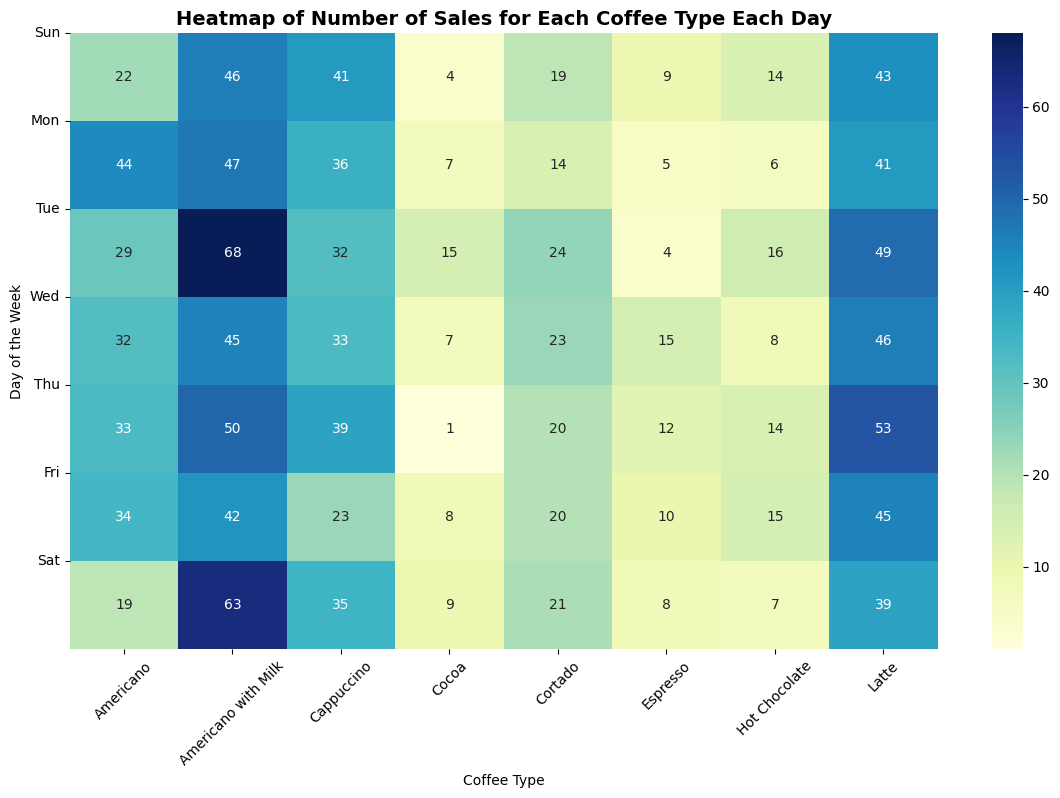

In [638]:
# Plot the data as a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(weekday_coffee_sales_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Number of Sales for Each Coffee Type Each Day', fontsize=14, fontweight='bold')
plt.xlabel('Coffee Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.yticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.show()

- *Americano with Milk has the highest sales on Tuesday (68 units) and Saturday (63 units), while Latte peaks on Thursday (53 units).*
- *Cappuccino has steady sales throughout the week, but drops to 23 units on Friday.*
- *Espresso has the lowest sales on Tuesday (4 units), while Cocoa has the lowest sales on Thusday (1 unit).*

Examining the total sales revenue for each coffee type on different days of the week to evaluate financial performance.

In [639]:
# Calculate the total sales for each coffee type each day
weekday_coffee_sales = (
    df.groupby(['day', 'coffee_name'])['money']
    .sum()
    .reset_index(name='Total Sales per Day')
    .rename(columns={'day': 'Day', 'coffee_name': 'Coffee Type'})
)

# Pivot the table to make 'Day' the index and 'Coffee Type' the columns
weekday_coffee_sales_pivot = (
    weekday_coffee_sales.pivot(index='Day', columns='Coffee Type', values='Total Sales per Day')
    .fillna(0)
)

# Print total sales for each type of coffee each day
print("Total sales for each type of coffee each day:")
print(weekday_coffee_sales_pivot)

Total sales for each type of coffee each day:
Coffee Type  Americano  Americano with Milk  Cappuccino   Cocoa  Cortado  \
Day                                                                        
0               588.02              1437.08     1460.58  137.16   512.10   
1              1175.10              1465.96     1329.46  239.54   380.22   
2               775.60              2073.62     1174.66  536.70   634.92   
3               832.78              1379.12     1215.68  250.32   607.00   
4               861.70              1538.10     1406.04   32.82   522.14   
5               906.28              1322.00      864.60  296.20   528.02   
6               517.94              1982.62     1293.38  328.32   527.52   

Coffee Type  Espresso  Hot Chocolate    Latte  
Day                                            
0              200.32         521.22  1564.76  
1              115.14         212.60  1473.64  
2               77.38         604.82  1749.92  
3              334.56        

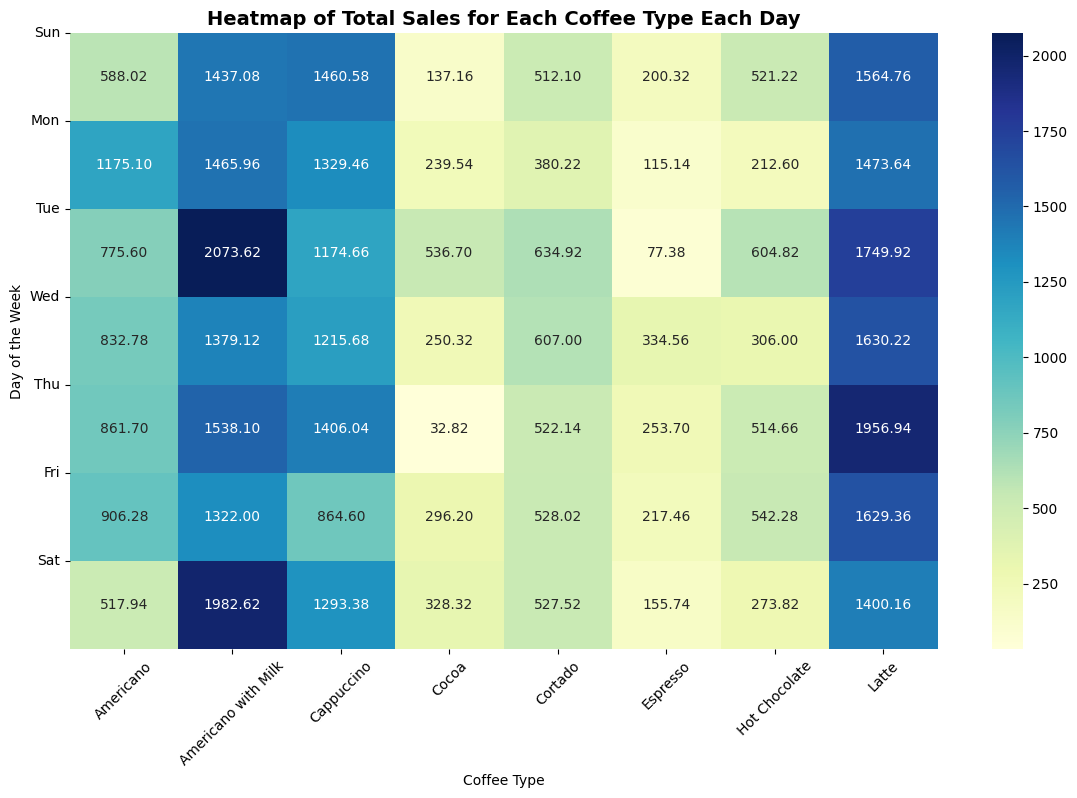

In [640]:
plt.figure(figsize=(14, 8))
sns.heatmap(weekday_coffee_sales_pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap of Total Sales for Each Coffee Type Each Day', fontsize=14, fontweight='bold')
plt.xlabel('Coffee Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.yticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.show()

- *Americano with Milk and Cappuccino show strong daily revenues, with Americano with Milk peaking at 2073.62 UAH on Wednesday and Cappuccino reaching  1460.58 UAH on Sunday.*
- *Latte consistently generates the high revenue each day, peaking at  1956.94 UAH on Tuesday.*
- *Espresso and Hot Chocolate have lower revenue compared to the top coffee types.*

### Sales Distribution by Hour of the Day

The number of coffee sales across different hours of the day to understand peak sales times

In [641]:
df['hour'] = df['hour'].astype(int)
# Group by the hour and count the number of coffee sales
hourly_sales = (
    df.groupby('hour')['money']
    .count()
    .reset_index(name='Count')
    .rename(columns={'hour': 'Hour'})
)

print("Number of coffee sold each hour:")
print(hourly_sales.to_string(index=False))

Number of coffee sold each hour:
 Hour  Count
    7     20
    8     83
    9     83
   10    159
   11    141
   12    114
   13     93
   14     90
   15     83
   16     91
   17     94
   18     90
   19    113
   20     74
   21     93
   22     43


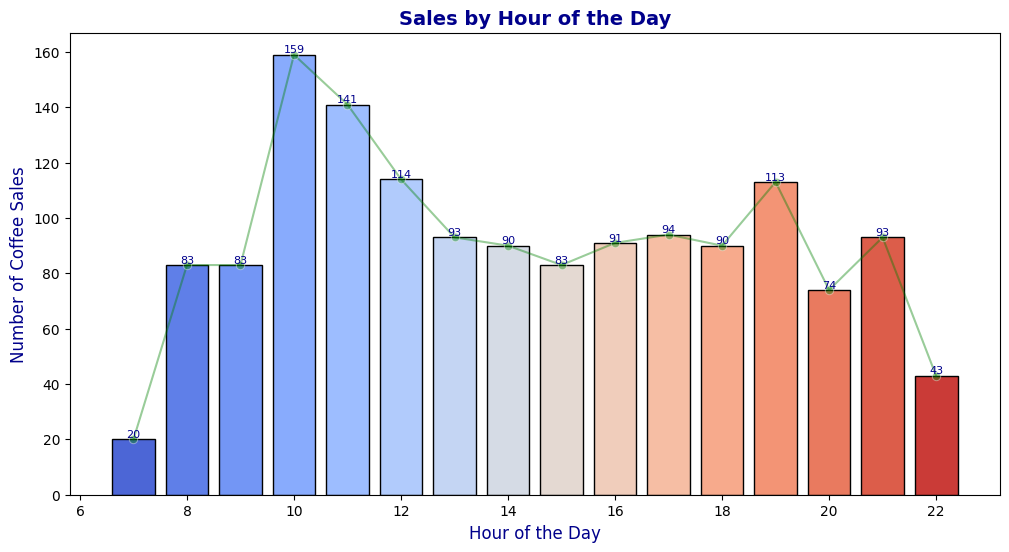

In [642]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get current axis
palette = sns.color_palette("coolwarm", n_colors=len(hourly_sales))

# Bar plot
bars = ax.bar(hourly_sales['Hour'], hourly_sales['Count'], edgecolor='black', color=palette)

# Line plot
sns.lineplot(x='Hour', y='Count', data=hourly_sales, color='green', marker='o', ax=ax, alpha=0.4)

ax.bar_label(bars, fontsize=8, color='darkblue')

plt.xlabel('Hour of the Day', fontsize=12, color='darkblue')
plt.ylabel('Number of Coffee Sales', fontsize=12, color='darkblue')
plt.title('Sales by Hour of the Day', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

- *Sales peak at 10:00 (159 units) and 11:00 (141 units), indicating high demand in the morning hours.*
- *The lunch period (12:00–13:00) is also active, with 114 and 93 units sold, respectively.*
- *In the afternoon (14:00–18:00), sales remain stable at 90–94 units.*
- *Evening hours (19:00–22:00) show a gradual decline, with the lowest at 22:00 (43 units).*
- *The fewest sales occur at 7:00 (20 units).*

Investigating the quantities of different coffee types sold each hour to identify preferred coffee choices throughout the day

In [643]:
# Group by 'hourly' and 'coffee_name' and count the number of sales for each type of coffee each hour
hourly_coffee_qty = (
    df.groupby(['hour', 'coffee_name'])['date']
    .count()
    .reset_index()
    .rename(columns={'hour': 'Hour', 'coffee_name': 'Coffee Type', 'date': 'Count'})
)

# Pivot the table to make 'hourly' the index and 'coffee_name' the columns
hourly_coffee_qty_pivot = (
    hourly_coffee_qty.pivot(index='Hour', columns='Coffee Type', values='Count')
    .reset_index()
)

In [644]:
hourly_coffee_qty_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 16 non-null     int32  
 1   Americano            16 non-null     float64
 2   Americano with Milk  16 non-null     float64
 3   Cappuccino           16 non-null     float64
 4   Cocoa                15 non-null     float64
 5   Cortado              16 non-null     float64
 6   Espresso             15 non-null     float64
 7   Hot Chocolate        15 non-null     float64
 8   Latte                16 non-null     float64
dtypes: float64(8), int32(1)
memory usage: 1.2 KB


In [645]:
# Fill all missing values with zeros and convert numerical columns to integers
hourly_coffee_qty_pivot = hourly_coffee_qty_pivot.fillna(0).astype(int)
# Print the result
print("Number of each type of coffee sold each hour:")
print(hourly_coffee_qty_pivot.to_string(index=False))

Number of each type of coffee sold each hour:
 Hour  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte
    7          6                    6           2      0        1         0              0      5
    8         16                   13          13      2       19         2              1     17
    9          9                   32          10      4        9         3              1     15
   10         23                   41          11      5       13         5              8     53
   11         29                   34          18      1       23         8              9     19
   12         23                   32          19      3       11         6              3     17
   13         19                   23          13      2       13         4              4     15
   14         16                   24          13      4        6         7              2     18
   15         16                   21          12      1        3       

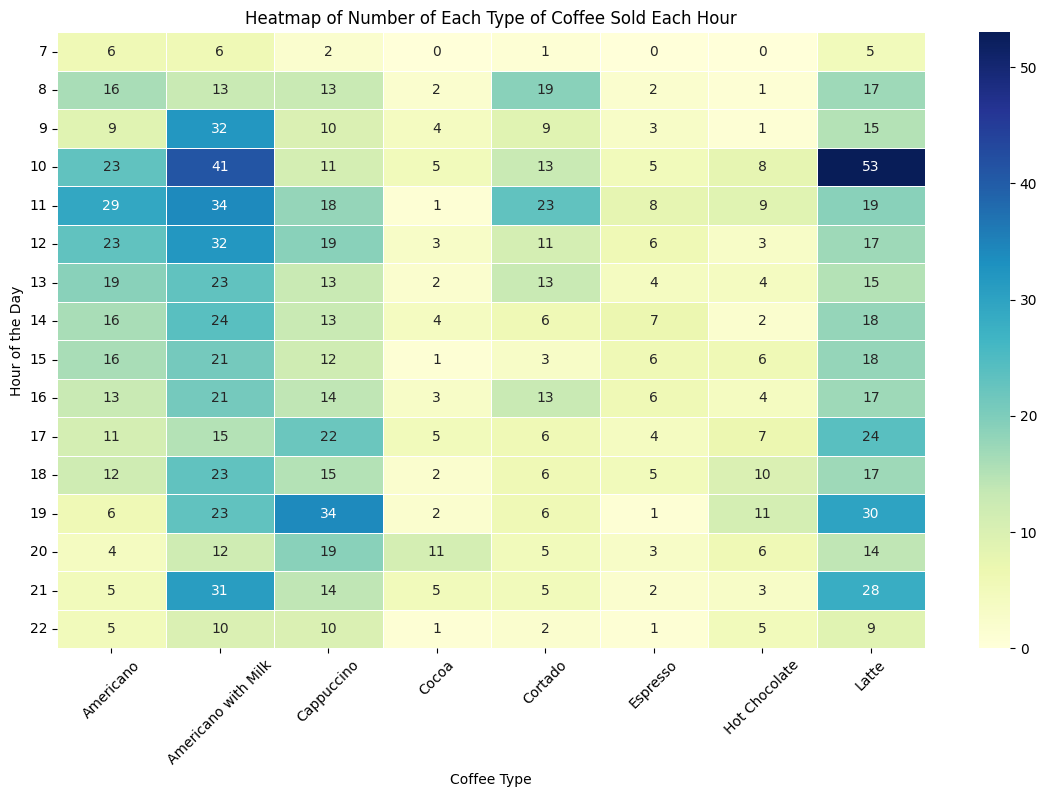

In [646]:
# Create a heatmap to visualize the number of each type of coffee sold each hour
plt.figure(figsize=(14, 8)) 
heatmap = sns.heatmap(hourly_coffee_qty_pivot.set_index('Hour'), cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Number of Each Type of Coffee Sold Each Hour')
plt.xlabel('Coffee Type')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- *Americano with Milk consistently shows high sales, peaking at 10:00 (41 units) and maintaining high volumes throughout the day, especially at 11:00-12:00 (34 and 32 units) and 21:00 (31 units).*
- *Latte reaches its highest sales at 10:00 (53 units), indicating consistent demand in the morning.*
- *Сappuccino has its peak sales at 19:00 (34 units) with stable volumes throughout the day, especially in the morning.*
- *Espresso and Cocoa show generally low sales, indicating lower demand for this type of coffee.*

Evaluating the total revenue generated from each coffee type per hour

In [647]:
# Calculate the total sales for each coffee type each hour
hourly_coffee_sales = (
    df.groupby(['hour', 'coffee_name'])['money']
    .sum()
    .reset_index(name='Total Sales per Hour')
    .rename(columns={'hour': 'Hour', 'coffee_name': 'Coffee Type'})
)

# Pivot the table to make 'Hour' the index and 'Coffee Type' the columns
hourly_coffee_sales_pivot = (
    hourly_coffee_sales.pivot(index='Hour', columns='Coffee Type', values='Total Sales per Hour')
    .fillna(0)
)

# Print total sales for each type of coffee each hour
print("Total sales for each type of coffee each hour:")
print(hourly_coffee_sales_pivot)

Total sales for each type of coffee each hour:
Coffee Type  Americano  Americano with Milk  Cappuccino   Cocoa  Cortado  \
Hour                                                                       
7               160.88               179.50       65.64    0.00    27.92   
8               392.82               382.56      460.96   65.64   456.98   
9               222.96               928.92      333.10  137.46   221.88   
10              627.58              1271.36      411.64  179.78   338.58   
11              744.24              1035.96      660.96   37.72   596.22   
12              603.06              1002.66      695.12  114.14   296.58   
13              533.42               726.44      486.10   71.52   360.02   
14              446.92               758.48      496.24  141.08   170.46   
15              446.06               656.12      431.40   32.82    86.82   
16              351.20               664.92      523.82  116.42   359.04   
17              299.40               468.

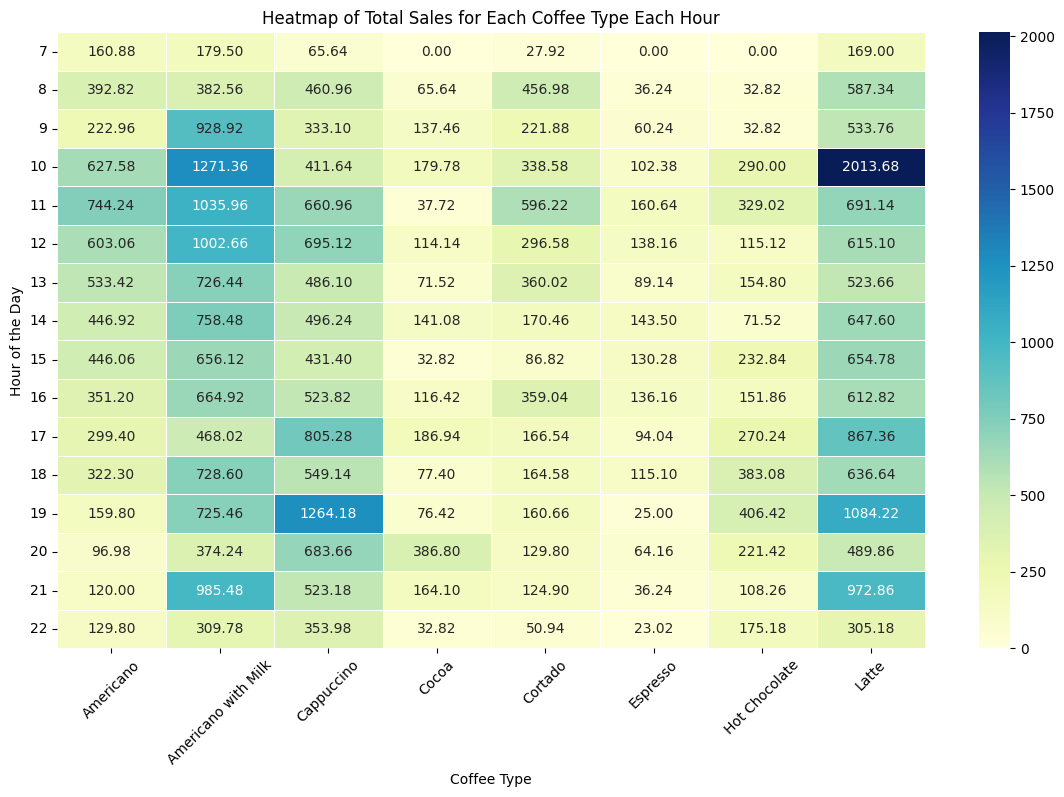

In [648]:
# Create a heatmap to visualize the total sales for each coffee type each hour
plt.figure(figsize=(14, 8))  # Set the size of the figure
heatmap = sns.heatmap(hourly_coffee_sales_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Total Sales for Each Coffee Type Each Hour')
plt.xlabel('Coffee Type')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

*The total sales figures illustrate significant revenue generation during peak hours. Despite a drop in sales towards the evening, coffee types like Latte and Americano with Milk maintain higher sales volumes and revenues throughout the day. It is worth noting a significant increase in cappuccino sales at 7 PM, where there is a peak in cappuccino sales for the day.*

### **Summary of Findings**
* **Dataset Overview:** The dataset includes 1464 records and 6 columns, with one numeric column and five categorical columns. There are no duplicate records, but 89 missing values are present in the 'card' column.
* **Basic Statistics:** The 'money' column shows an average coffee price of approximately 32.01 units. The most common coffee is 'Americano with Milk', and card payments are predominant.
* **Top Coffee Types:** 'Americano with Milk' has the highest sales volume, while 'Latte' generates the most revenue.
Transaction Insights: For card transactions, 'Americano with Milk', 'Latte', and 'Cappuccino' are the most frequently sold, whereas 'Cocoa' is the least sold. For cash transactions, 'Latte', 'Americano with Milk', and 'Cappuccino' lead in sales. Cocoa has the lowest count at 4.
* **Payment Method Analysis:** Card transactions constitute 93.92% of the data, and prices tend to be lower for card payments compared to cash, possibly due to promotional discounts or lower processing fees.
* **Price Trends:** Hot Chocolate has the highest average price, while Espresso has the lowest. Prices for coffee types decreased gradually over time.
* **Sales Trends:** Highest sales were recorded in May 2024, and Tuesday shows the highest sales of the week. Coffee sales peak between 10 AM and 12 PM, with Latte and Americano with Milk being popular during peak hours.

### **Conclusion**
The analysis reveals that 'Latte', 'Americano with Milk', and 'Cappuccino' are the most strategically important coffee types due to their high sales volumes and revenue. 'Cocoa' and 'Espresso' have lower sales figures and might benefit from targeted marketing or pricing strategies. The trend of lower card payment prices suggests potential promotional or processing fee advantages. The significant drop in sales toward the evening indicates the need to explore promotional strategies to maintain customer interest throughout the day.

### **Recommendations**
* **Marketing and Promotion:** Focus on increasing the visibility and appeal of less popular coffee types like 'Cocoa' and 'Espresso'. Consider introducing special promotions or discounts to boost their sales.
* **Pricing Strategy:** Evaluate the pricing strategy for card vs. cash transactions and explore opportunities to standardize pricing or adjust promotions to attract more customers.
* **Peak Hours Strategy:** Enhance marketing efforts and promotions during peak hours (10 AM - 12 PM) and consider strategies to boost sales during lower periods, especially in the late evening.
* **Seasonal Adjustments:** Investigate seasonal trends and plan promotions or special offers during high-sales months like May to maximize revenue.

### **Future Work**
* **Seasonal Trends:** Analyze seasonal patterns to optimize inventory and marketing.
* **Promotions Impact:** Assess how promotions affect sales.
* **Customer Insights:** Study customer demographics to refine offerings.
* **Sales Forecasting:** Create models to predict future coffee sales.